# This notebook describes how to create landmarks on an image of a hand

In [ ]:
!pip install -q mediapipe==0.10.0
!wget -O hand_landmarker.task -q https://storage.googleapis.com/mediapipe-assets/hand_landmarker.task
!wget -O gesture_recognizer.task -q https://storage.googleapis.com/mediapipe-assets/gesture_recognizer.task
!pip uninstall protobuf
!pip -q install protobuf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 9.7 MB/s eta 0:00:00
Found existing installation: protobuf 3.20.3
Uninstalling protobuf-3.20.3:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/google/protobuf/*
    /usr/local/lib/python3.10/dist-packages/protobuf-3.20.3-py3.10-nspkg.pth
    /usr/local/lib/python3.10/dist-packages/protobuf-3.20.3.dist-info/*
Proceed (Y/n)? y
  Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mediapipe 0.10.0 requires protobuf<4,>=3.11, but you have protobuf 4.23.1 which is incompatible.


In [ ]:
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

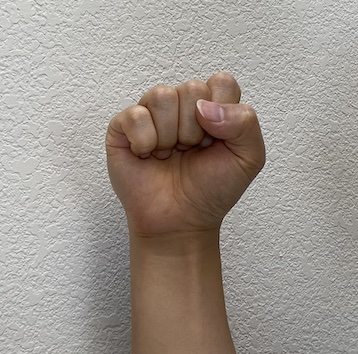

In [ ]:
!wget -q -O image.jpg https://storage.googleapis.com/mediapipe-assets/fist.jpg

import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread("image.jpg")
cv2_imshow(img)

In [ ]:
BaseOptions = mp.tasks.BaseOptions
GestureRecognizer = mp.tasks.vision.GestureRecognizer
GestureRecognizerOptions = mp.tasks.vision.GestureRecognizerOptions
VisionRunningMode = mp.tasks.vision.RunningMode

In [ ]:
base_options = python.BaseOptions(model_asset_path='gesture_recognizer.task')
options = GestureRecognizerOptions(
    base_options=base_options,
    running_mode=VisionRunningMode.IMAGE)
recognizer = vision.GestureRecognizer.create_from_options(options)

In [ ]:
image = mp.Image.create_from_file("image.jpg")
gesture_recognition_result = recognizer.recognize(image)

/usr/local/lib/python3.10/dist-packages/google/protobuf/symbol_database.py:78: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


In [ ]:
results = gesture_recognition_result.hand_landmarks

In [ ]:
from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np

def draw_landmarks_on_image(rgb_image, detection_result):
    gesture_landmark_list = detection_result.hand_landmarks
    annotated_image = np.copy(rgb_image)

    # Loop through the detected hands to visualize.
    for idx in range(len(gesture_landmark_list)):
        hand_landmarks = gesture_landmark_list[idx]

        # Convert hand landmarks to the required format.
        hand_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
        #print(hand_landmarks_proto)
        hand_landmarks_proto.landmark.extend([
            landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in hand_landmarks
        ])
        #print(hand_landmarks_proto)

        # Draw the hand landmarks on the image.
        solutions.drawing_utils.draw_landmarks(
            image=annotated_image,
            landmark_list=hand_landmarks_proto,
            connections=mp.solutions.hands_connections.HAND_CONNECTIONS,
            landmark_drawing_spec=mp.solutions.drawing_styles.
            get_default_hand_landmarks_style(),
            connection_drawing_spec=mp.solutions.drawing_styles.
            get_default_hand_connections_style())

    return annotated_image


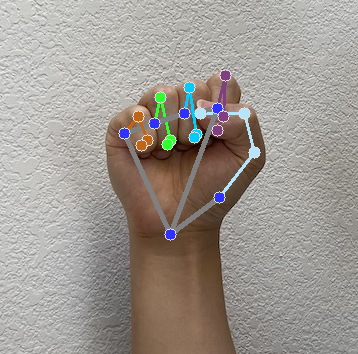

In [ ]:
annotated_image = draw_landmarks_on_image(image.numpy_view(), gesture_recognition_result)
cv2_imshow(cv2.cvtColor(annotated_image, cv2.COLOR_RGB2BGR))

In [ ]:
top_gesture = gesture_recognition_result.gestures[0][0]
hand_landmarks = gesture_recognition_result.hand_landmarks

print(top_gesture)

Category(index=-1, score=0.9000440835952759, display_name='', category_name='Closed_Fist')
